## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [4]:

from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

In [5]:
map2=gis.map("Uzbekistan")
map2.basemap="dark-gray"
map2

MapView(layout=Layout(height='400px', width='100%'))

<Item title:"AirNow Air Quality Monitoring Site Data (Current)" type:Feature Layer Collection owner:OAR_OAQPS_EPA>
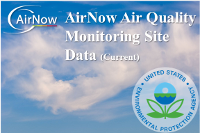

In [6]:
new_layer=gis.content.get('2d718d2733a74d1689d72b922c0ac4f4')
new_layer

In [7]:
map2.add_layer(new_layer)
map2

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
from arcgis.features import FeatureLayer
feature_layer = map2.layers[0]
feature_layer
for f in feature_layer.properties.fields:
    print(f['name'])

AQSID
CountryCode
DataSource
EPARegion
Elevation
GMTOffset
Latitude
LocalTimeString
Longitude
OZONE
OZONEPM_AQI
OZONEPM_AQI_LABEL
OZONEPM_AQI_SORT
OZONE_AQI
OZONE_AQI_LABEL
OZONE_AQI_SORT
OZONE_Measured
OZONE_Unit
PM10
PM10_AQI
PM10_AQI_LABEL
PM10_AQI_SORT
PM10_Measured
PM10_Unit
PM25
PM25_AQI
PM25_AQI_LABEL
PM25_AQI_SORT
PM25_Measured
PM25_Unit
PM_AQI
PM_AQI_LABEL
PM_AQI_SORT
ReportingArea_PipeDelimited
SiteName
StateName
Status
ObjectId


# Countries with poor air quality 

### Worst Air Quality table (Real time)

In [9]:
query_result1 = feature_layer.query(where='PM25_AQI>100 and PM25_AQI<500', as_df=True )
query_result1=query_result1[['PM25_AQI','SiteName']].sort_values(by=["PM25_AQI"])
query_result1= query_result1.reset_index(drop=True)
query_result1.index += 1
query_result1

,PM25_AQI,SiteName
1,103.0,Sarajevo
2,103.0,Guangzhou
3,104.0,Addis Ababa Jacros
4,105.0,Estación San Juanico
5,105.0,Nonsi Witthaya School
6,106.0,National Housing Huaykwang
7,106.0,Compton
8,108.0,Department of Disease Control
9,113.0,Bakersfield - Golden State Highway
10,116.0,National Housing Authority Klongchan


<AxesSubplot:xlabel='SiteName'>

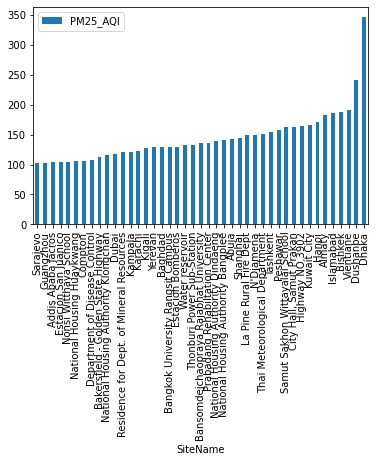

In [10]:
import matplotlib
query_result1.plot('SiteName','PM25_AQI', kind='bar')